In [2]:
%pylab inline

# Params
BASEDATADIR = "/storage/mgymrek/gtex-estrs-paper/revision/data/"
BASERESULTSDIR = "/storage/mgymrek/gtex-estrs-paper/revision/results"

# Allow us to edit fonts in Illustrator
import matplotlib
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True

# Import libraries
import os
import pandas as pd
import scipy.stats

COLORS = {
    "Artery-Aorta":"salmon",
    "Artery-Tibial": "red",
    "Adipose-Subcutaneous": "darkorange",    
    "Adipose-Visceral":"orange",
    "Brain-Caudate":"lemonchiffon"   , 
    "Brain-Cerebellum":"yellow",
    "Cells-Transformedfibroblasts": "skyblue",
    "Esophagus-Mucosa": "sienna",
    "Esophagus-Muscularis":"burlywood",
    "Heart-LeftVentricle":"darkviolet",
    "Lung": "greenyellow",
    "Muscle-Skeletal": "mediumslateblue",
    "Nerve-Tibial":"gold",
    "Skin-NotSunExposed":"blue",
    "Skin-SunExposed":"cornflowerblue",
    "Thyroid":"green",
    "WholeBlood": "m",
}

############ Set up paths #############
SAVEPLOT = True
PREFIX = "eSTR-calling"
FIGPREFIX = "SuppFig"
DATADIR = os.path.join(BASEDATADIR, PREFIX)
RESULTSDIR = os.path.join(BASERESULTSDIR, PREFIX)

Populating the interactive namespace from numpy and matplotlib


In [17]:
TISSUES = [item for item in list(COLORS.keys()) if item != "permuted"]

num_samples = []
num_estrs = []
num_fmestrs = [] # TODO redo with master table

# Keep track of unique eSTRs
chroms = []
starts = []
genes = []

for t in TISSUES:
    num_samples.append(len(open("/storage/mgymrek/gtex-estrs-paper/revision/data/eSTR-calling/samples/%s.samples"%t, "r").readlines()))
    d = pd.read_csv("/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/Review_Rerun/%s/PQValues"%t, sep="\t")
    estrs = d[d["significant"]==1]
    num_estrs.append(estrs.shape[0])
    chroms.extend(list(estrs["chrom"]))
    starts.extend(list(estrs["str.start"]))
    genes.extend(list(estrs["gene"]))

# Number of unique eSTRs
allestrs = pd.DataFrame({"chrom_x": chroms, "str.start": starts, "gene": genes}).drop_duplicates()
print("Number unique eSTRs: %s"%(allestrs[["chrom_x","str.start","gene"]].shape[0]))
print("Number unique genes: %s"%(len(set(allestrs["gene"]))))

Number unique eSTRs: 28408
Number unique genes: 12544


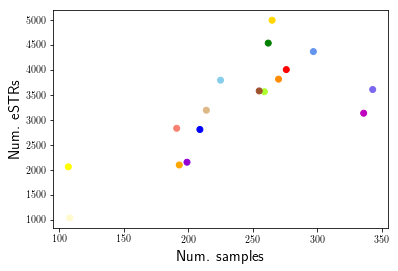

In [11]:
# Supp Fig SamplePower
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(num_samples, num_estrs, color=[COLORS[t] for t in TISSUES]);
ax.set_xlabel("Num. samples", size=15)
ax.set_ylabel("Num. eSTRs", size=15);
if SAVEPLOT: fig.savefig(os.path.join(RESULTSDIR, "%s_SamplePower.pdf"%FIGPREFIX));

In [13]:
# Supp Table 1
table = pd.DataFrame({"Tissue": TISSUES, "Samples": num_samples, "eSTRs": num_estrs})
table.sort_values("eSTRs", ascending=False)

,Samples,Tissue,eSTRs
12,265,Nerve-Tibial,4997
2,262,Thyroid,4539
5,297,Skin-SunExposed,4369
16,276,Artery-Tibial,4008
1,270,Adipose-Subcutaneous,3817
10,225,Cells-Transformedfibroblasts,3796
4,343,Muscle-Skeletal,3609
6,255,Esophagus-Mucosa,3581
0,259,Lung,3565
7,214,Esophagus-Muscularis,3194


In [15]:
%%bash -s "$DATADIR"

DATADIR=$1
TISSUES="Adipose-Subcutaneous Adipose-Visceral Artery-Aorta Artery-Tibial Brain-Caudate Brain-Cerebellum \
    Cells-Transformedfibroblasts Esophagus-Mucosa Esophagus-Muscularis Heart-LeftVentricle Lung \
    Muscle-Skeletal Nerve-Tibial Skin-NotSunExposed Skin-SunExposed Thyroid WholeBlood"

# Number of genes tested per tissue
for t in $TISSUES
do
    echo $(cat ${DATADIR}/${t}_LinearRegression.tab | cut -f 2 | uniq | wc -l)
done | datamash mean 1

# Number of STR by gene tests
for t in $TISSUES
do
    echo $(cat ${DATADIR}/${t}_LinearRegression.tab | grep -v gene | wc -l)
done | datamash mean 1

15850.588235294
278229.82352941
